In [2]:
import pandas as pd
import xarray as xr
data = xr.load_dataset('20140820_ssj_f16.nc')

In [3]:
data['timestamps'] = pd.to_datetime(data['timestamps'].values, unit='s', origin='unix')
sliced_data = data.sel(timestamps=slice('2014-08-20T16:12:30', '2014-08-20T16:23:30'))


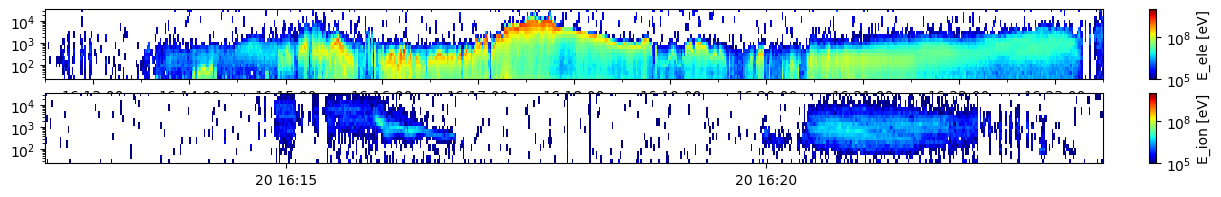

In [8]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np
import matplotlib.dates as mdates
fig, (ax,ax1) = plt.subplots(2, 1, figsize=(15, 2))

# Log scale normalization for color mapping
norm = mcolors.LogNorm(vmin=1e5, vmax=1e10)

# Create pcolormesh with logarithmic normalization of data
data_log = sliced_data['el_d_ener'].values
ch_energy = sliced_data['ch_energy'].values
time = sliced_data['timestamps'].values
s = ax.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax.set_yscale('log')
ax.set_xlim(time[0], time[-1])
# Add colorbar
cbar = plt.colorbar(s, ax=ax, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ele [eV]')
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M:%S'))
# Set major ticks locator
ax.xaxis.set_major_locator(mdates.MinuteLocator(interval=1))

# Set minor ticks locator
ax.xaxis.set_minor_locator(mdates.SecondLocator(interval=30))

data_log = sliced_data['ion_d_ener'].values
s = ax1.pcolormesh(time , ch_energy, data_log.T, cmap='jet', norm=norm)
ax1.set_yscale('log')
cbar = plt.colorbar(s, ax=ax1, aspect=10, fraction=0.05, pad=0.04)
cbar.set_label('E_ion [eV]')